<a href="https://colab.research.google.com/github/songiangvn/Algorithms/blob/main/Graph_Theory_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài toán luồng cực đại trên mạng

## Network

Một đồ thị ***G(V,E)*** được gọi là mạng (network) nếu nó là đồ thị **có hướng**, trong đó:

- Tồn tại một đỉnh  không có cạnh đi vào, gọi là đỉnh **phát/nguồn (source)**
- Tồn tại một đỉnh  không có cạnh đi ra, gọi là đỉnh **thu/đích (sink)**
- Mỗi cạnh (u,v)  được gán một trọng số , gọi là khả năng thông qua/dung lượng (**capacity**) của cạnh.

<img src="https://hackmd.io/_uploads/rkBl97iL3.png" alt="">

## Flow

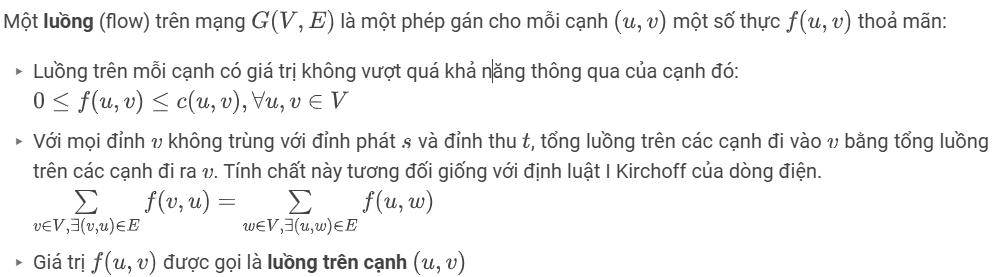

**Giá trị của luồng** là tổng luồng trên các cạnh đi ra khỏi đỉnh phát, cũng chính là tổng luồng trên các cạnh đi vào đỉnh thu.

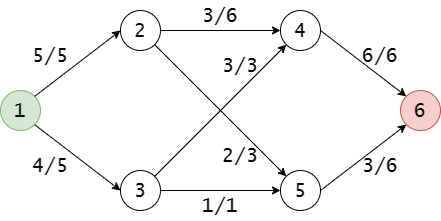

Một luồng hợp lệ. Giá trị f/c trên cạnh biểu diễn luồng/khả năng thông qua.

## Cut

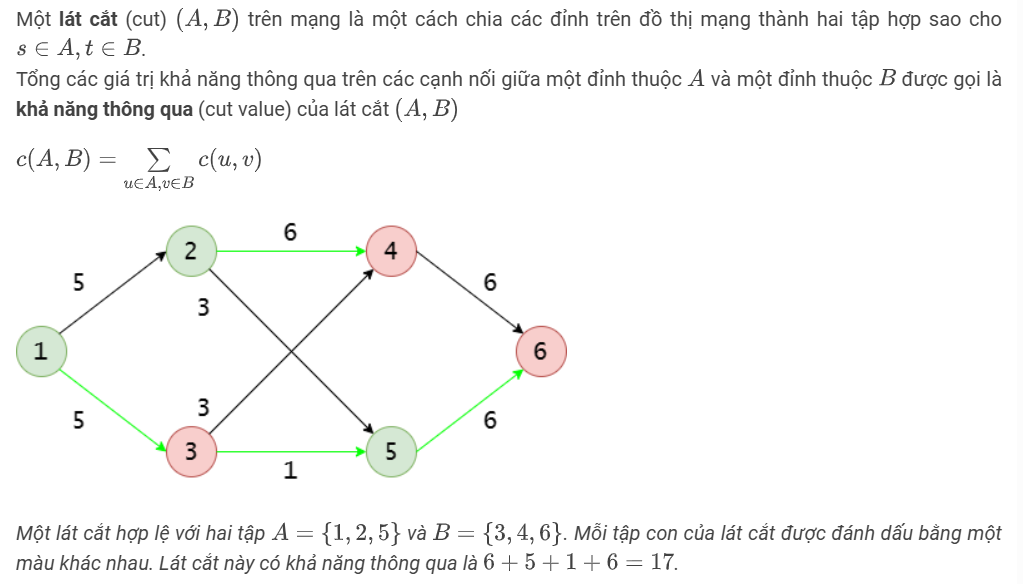

**Định lý:** Trên cùng một mạng, tất cả mọi luồng đều có giá trị không lớn hơn khả năng thông qua của một lát cắt bất kỳ.

## Recap:

Nếu ta hiểu mạng như một hệ thống ống nước, nó sẽ như sau:

- Nước chảy qua một hệ thống các ống, từ nguồn nước (đỉnh phát) đến bồn chứa (đỉnh thu).
- Mỗi ống có một giới hạn nhất định. Lượng nước chảy qua ống này không thể vượt quá giới hạn này.
- Hiển nhiên, tại mỗi điểm nút (trừ điểm đầu và điểm cuối), có bao nhiêu nước đến thì sẽ có bấy nhiêu nước chảy đi. Nước không tự sinh ra và mất đi, chúng chỉ chảy từ điểm này sang điểm khác.
- Và tất nhiên tổng lượng nước xuất hiện trong mạng sẽ là lượng nước ta cấp cho nguồn. Bể chứa cũng sẽ thu được từng đó nước.
- Còn một lát cắt là một cách bỏ đi các ống sao cho nước không thể chảy từ nguồn đến bể nữa bằng bất kỳ cách nào.

## Bài toán:

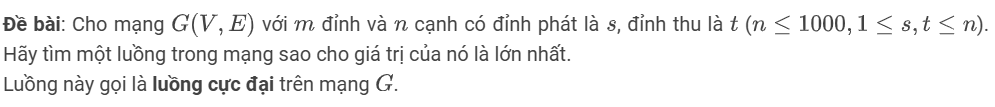

# Phương pháp Ford-Fulkerson & Thuật toán Edmonds-Karp

## Residual Flow - Luồng thặng dư

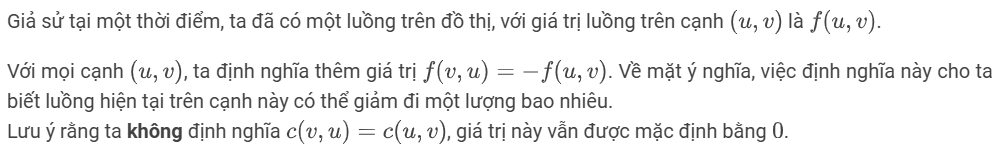

Định nghĩa luồng thặng dư **(residual flow)** trên một cạnh tại một thời điểm là hiệu của khả năng thông qua và giá trị luồng hiện tại trên cạnh đó:
- *r(u,v) = c(u,v) - f(u,v)*

Giá trị này cũng áp dụng cho cả các cạnh đảo (cạnh có luồng âm), khi đó

- *r(v,u) = 0 - f(v,u) = f(u,v)*

Ta có thể hiểu rằng giá trị luồng thặng dư cho biết còn có thể thêm vào luồng này một lượng bao nhiêu.

Với các giá trị *r(u,v)* này, ta có thể xây dựng một đồ thị thặng dư/đồ thị tăng luồng (residual network). Ứng với mỗi cạnh *(u,v)* trên mạng ban đầu, trên đồ thị thặng dư sẽ có hai cạnh:

- Cạnh *(u,v)*, với trọng số là *r(u,v)*. Mỗi cạnh loại này cho ta biết có thể tăng luồng trên mạng ban đầu bao nhiêu.
- Cạnh *(v,u)*, với trọng số là *f(u,v)*. Mỗi cạnh loại này cho ta biết có thể giảm luồng trên mạng ban đầu bao nhiêu.

<img src="https://hackmd.io/_uploads/r1pDeY0v2.png" alt="">

Một đường tăng luồng **(augmenting path)** là một đường đi đơn trên đồ thị thặng dư. Đối chiếu lại với đồ thị gốc, đó sẽ là một đường đi đơn (có thể đi ngược chiều cạnh) qua những cạnh có **r(u,v) > 0**. Trên đường này, chúng ta có thể thực hiện tăng giá trị của luồng trên mỗi cạnh.

Đường màu xanh là một đường tăng luồng trên đồ thị thặng dư trên. Các cạnh đứt chính là các cạnh "ngược" so với mạng ban đầu; chúng có giá trị **f** âm.

<img src="https://hackmd.io/_uploads/Bk0Wlt0w2.png" alt="">

Đem đối chiếu đồ thị thặng dư trên về đồ thị gốc, ta được đường tăng luồng như hình trên. Trong hình dưới, giá trị của luồng (f) trên các cạnh thuộc đường tăng luồng đã được tăng 1 đơn vị so với đồ thị thặng dư bên trên.

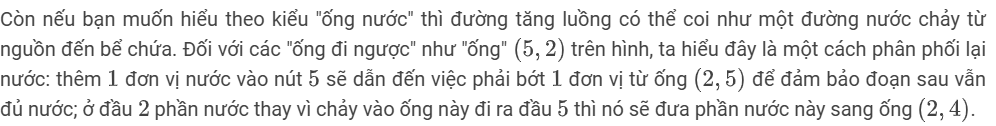

## Thuật toán

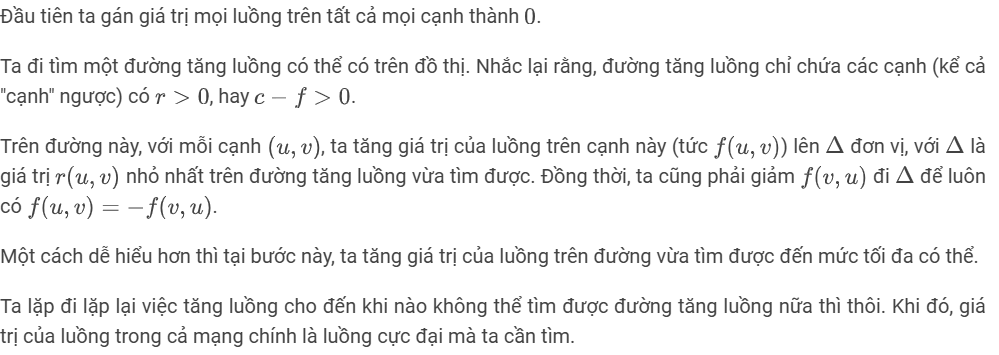

![GIF minh họa](https://wiki.vnoi.info/algo/graph/flow/upload_8b6e4036651cb9b372cf7d1592220a2e.gif)

Để tìm 1 đường tăng luồng, ta cần tìm 1 đường đi từ s tới t thỏa mãn các cạnh có r(u,v) = c(u,v) - f(u,v) > 0. Đây chỉ là một bài toán duyệt đồ thị đơn giản, ta có thể thử áp dụng DFS, BFS, ... để duyệt.

Hai thuật BFS và DFS có độ phức tạp giống nhau, nhưng trên thực tế BFS chạy nhanh hơn DFS khi đi tìm đường tăng luồng. Thuật Edmonds-Karp sử dụng BFS.

## Hệ quả:

- Khả năng thông qua của lát cắt hẹp nhất trên một mạng bằng giá trị của luồng cực đại trên mạng đó.** Lát cắt hẹp nhất (mincut)** là lát cắt có khả năng thông qua nhỏ nhất trong số mọi lát cắt thuộc mạng.

- Nếu mọi giá trị  trên luồng đều là số nguyên thì giá trị luồng cực đại cũng là số nguyên.

## Thuật toán khác tìm đường tăng luồng:

Sử dụng thuật toán tìm kiếm ưu tiên(Priority First Search-PFS)
Thuật toán này tìm ra đường mở có thể tăng luồng lớn nhất trong tất cả các đường mở và khá giống với thuật toán Dijkstra tìm đường đi ngắn nhất vì cùng sử dụng hàng đợi ưu tiên priority_queue, nó được chứng minh có độ phức tạp là E * logU với U là khả năng thông qua lớn nhất và độ phức tạp của hàng đợi ưu tiên (priority_queue) là E*logE nhưng cũng như khi dùng bfs để tìm đường mở pfs cũng chạy nhanh hơn lý thuyết rất nhiều

```python
def pfs(int source, int sink):
    # khởi tạo mảng đánh dấu visited ( false nếu chưa thăm, true nếu đã thăm)
    fill(all(visited), False)
    #
    fill(all(minCapacity), 0)

    # đẩy source vào priority_queue pq với giá trị luồng cực đại là vô cùng lớn
    pq.push([source, inf])

    while queue.not_empty():
        uAndMinCapacity = queue.pop()
        minC = uAndMinCapacity[1]
        u = uAndCapacity[0]

        visited[u] = True

        # duyệt hết các đỉnh v có thể đến được từ u hay thỏa mãn điều kiện c[u][v] - f[u][v] > 0
        for( v in VertecesCanComeFromU ):
            if !visited[v] && min(minC, c[u][v]-f[u][v]) > minCapacity[v]:
                minCapacity[v] = c[u][v]-f[u][v]
                queue.push([v, minCapacity[v]])
                trace[v] = u

def find_augment_from_to(int source, int sink):
    """
        brief: hàm này sẽ tìm một đường tăng luồng từ source đến sink
        return:
            - Nếu có một đường tăng luồng trả về True
            - Nếu không có đường tăng luồng nào trả về False
    """
    # Dùng thuật toán bfs tìm đường tằng luồng từ source đến sink
    pfs(source, sink)

    return visited[sink]
```

## Cài đặt

Link bài toán: https://oj.vnoi.info/problem/nkflow

In [ ]:
INF = 10**6 + 1

n, m, s, t = map(int, input().split())

adj = [[] for i in range(n + 1)]
c = [[0] * (n + 1) for i in range(n + 1)]
f = [[0] * (n + 1) for i in range(n + 1)]
trace = [-1] * (n + 1)

for i in range(m):
    u, v, cost = map(int, input().split())
    c[u][v] = cost
    # print(u, v, cost)
    adj[u].append(v)
    adj[v].append(u)

# print(c)
from collections import deque


def bfs(s, t):
    for i in range(1, n + 1):
        trace[i] = -1
    q = deque([s])
    trace[s] = s

    while q:
        u = q.popleft()
        for v in adj[u]:
            if trace[v] == -1 and c[u][v] - f[u][v] > 0:
                trace[v] = u
                q.append(v)
    return trace[t]


def incFlow(s, t):
    delta = INF
    v = t
    while v != s:
        u = trace[v]
        # print(u, v, c[u][v], f[u][v])
        delta = min(delta, c[u][v] - f[u][v])
        v = u

    v = t
    while v != s:
        u = trace[v]
        f[u][v] += delta
        f[v][u] -= delta
        v = u
    # print(delta)
    return delta


def maxFlow(s, t):
    maxflow = 0
    while True:
        if bfs(s, t) == -1:
            break
        maxflow += incFlow(s, t)
    return maxflow


print(maxFlow(s, t))


6 8 1 6
1 2 5
1 3 5
2 4 6
2 5 3
3 4 3
3 5 1
4 6 6
5 6 6 
9


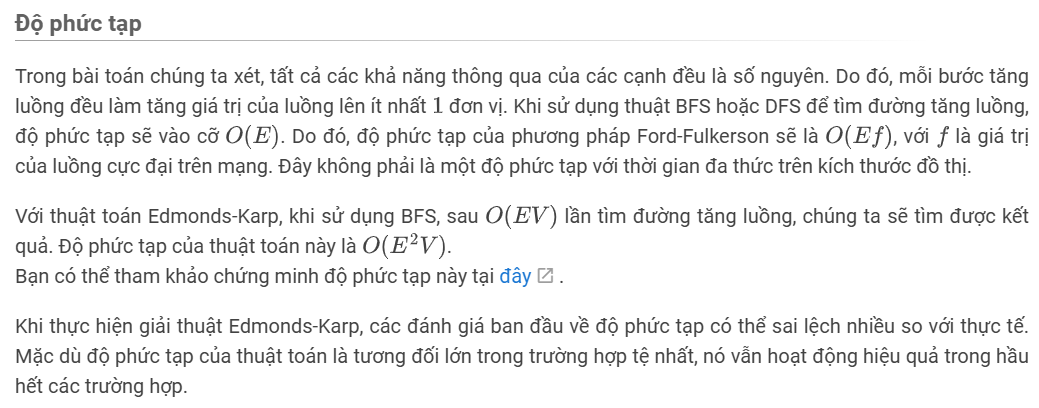

# Thuật toán Dinic - O(EV^2)

## Các khái niệm

- Một luồng cản (**blocked flow**) là một tập các cạnh trên đồ thị có dạng giống như luồng trên mạng sao cho mọi đường đi từ **s** đến **t** đều chứa ít nhất một cạnh thuộc tập này.

Note: Là dfs đến khi không thể tìm được đường đi từ s -> t mà đi qua một con đường mới nữa

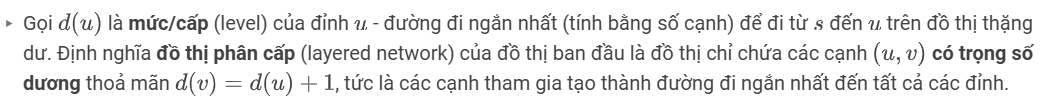

<img src="https://hackmd.io/_uploads/S1bhMtRD2.png" alt="">

Đồ thị phân cấp (tất cả các đường có màu) và luồng cản (xanh lam) của đồ thị thặng dư

## Thuật toán:

Ta dựng đồ thị phân cấp của đồ thị thặng dư. Trên đồ thị này, ta tìm một luồng cản rồi tăng luồng ở tất cả các cạnh trên luồng cản này càng nhiều càng tốt. Nói cách khác, đây là phương pháp Ford-Fulkerson với các đường tăng luồng là các đường cản trong luồng cản. Lặp lại quá trình trên cho tới khi ta không thể tìm được đường đi từ **s** tới **t** trên đồ thị phân cấp nữa, hay **d(t)** không xác định.

Để tìm luồng cản, ta sử dụng DFS để tìm từng đường cản một. Mỗi đường cản là một đường đi có trọng số dương từ **s** tới **t** trên đồ thị phân cấp. Đây là lý do thuật Dinic được gọi là "dùng cả BFS và DFS để tìm luồng".

Để tối ưu việc cài đặt, ta có thể:

- Không dựng đồ thị thặng dư và đồ thị phân cấp. Cũng như thuật toán Edmonds-Karp, ta hoàn toàn có thể sử dụng thêm các "cạnh" ngược với giá trị luồng âm để biểu diễn các cạnh ngược trong đồ thị thặng dư. Việc sử dụng đồ thị phân cấp thì chỉ là đánh các nhãn *d(u)* cho các đỉnh u của đồ thị, rồi kiểm tra *c(u,v) - f(u,v) > 0* và *d(v) = d(u) + 1* để biết cạnh *(u,v)* (kể cả ngược) có thuộc đồ thị phân cấp không.

- Tại mỗi đỉnh, chỉ DFS từ cạnh cuối cùng được xét trong lần tìm đường cản trước đó với cùng một bộ **d** (hay cùng một đồ thị phân cấp) (xem code để hiểu phần này hơn). Việc tiếp tục sử dụng một cạnh nào đó của các đường trước đó để tăng luồng là vô nghĩa, vì trong những lần tìm trước đó, ta đã khẳng định là chúng không thể tạo ra đường cản mới rồi. Khi không tìm được bất kỳ đường cản nào nữa, luồng cản hiện tại coi như đã xong. Ta tăng luồng và đánh lại **d** cho các đỉnh.


### Mô tả thuật toán Dinic

<img src="https://hackmd.io/_uploads/rk_v4KRv3.gif" alt="">

Tất cả các cạnh có màu đều là các cạnh nằm trên đồ thị phân cấp. Các cạnh màu xanh và đỏ là các cạnh nằm trên luồng cản tìm được sau mỗi bước.

Trong bước DFS, để lập trình đơn giản hơn một chút, ta sẽ kết hợp DFS và tăng luồng. Mỗi lần đi tìm đường cản, ta có thể kết hợp lưu lại giá trị **delta** nhỏ nhất trên đường này luôn, và khi đường này đến được **t**, ta thực hiện tăng luồng trên những cạnh đã xét.

In [ ]:
INF = 10**6 + 1

n, m, s, t = map(int, input().split())

adj = [[] for i in range(n + 1)]
c = [[0] * (n + 1) for i in range(n + 1)]
f = [[0] * (n + 1) for i in range(n + 1)]
d = [-1] * (n + 1)
curVertexId = [0] * (n + 1)

for i in range(m):
    u, v, cost = map(int, input().split())
    c[u][v] = cost
    # print(u, v, cost)
    adj[u].append(v)
    adj[v].append(u)

# print(c)
from collections import deque


def bfs(s, t):
    for i in range(1, n + 1):
        d[i] = -1
    q = deque([s])
    d[s] = 0

    while q:
        u = q.popleft()
        for v in adj[u]:
            if d[v] == -1 and c[u][v] - f[u][v] > 0:
                d[v] = d[u] + 1
                q.append(v)
    return d[t]


def dfs(u, t, curDelta):
    if curDelta == 0:
        return 0
    if u == t:
        return curDelta
    for i in range(curVertexId[u], len(adj[u])):
        curVertexId[u] += 1
        v = adj[u][i]
        if d[v] != d[u] + 1 or c[u][v] - f[u][v] == 0:
            continue
        delta = dfs(v, t, min(curDelta, c[u][v] - f[u][v]))
        if delta > 0:
            f[u][v] += delta
            f[v][u] -= delta
            curVertexId[u] = i
            return delta
    return 0


def maxFlow(s, t):
    maxflow = 0
    while True:
        if bfs(s, t) == -1:
            break
        for i in range(1, n + 1):
            curVertexId[i] = 0
        while True:
            delta = dfs(s, t, INF)
            if delta == 0:
                break
            maxflow += delta
    return maxflow


print(maxFlow(s, t))


6 8 1 6
1 2 5
1 3 5
2 4 6
2 5 3
3 4 3 
3 5 1
4 6  6 
5 6 6 
9


## Độ phức tạp
Định lý: Thuật toán Dinic có độ phức tạp là O(EV^2)

# Một số chú ý

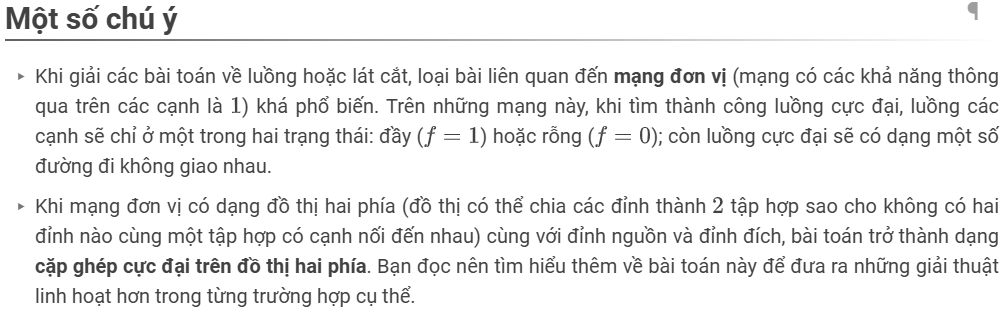

# MCMF: Min Cost Max Flow

Given a network $G$ consisting of
$n$ vertices and
$m$ edges. For each edge (generally speaking, oriented edges, but see below), the capacity (a non-negative integer) and the cost per unit of flow along this edge (some integer) are given. Also the source $s$ and the sink
$t$ are marked.

For a given value
$K$, we have to find a flow of this quantity, and among all flows of this quantity we have to choose the flow with the lowest cost. This task is called minimum-cost flow problem.

Sometimes the task is given a little differently: you want to find the maximum flow, and among all maximal flows we want to find the one with the least cost. This is called the minimum-cost maximum-flow problem.

Both these problems can be solved effectively with the algorithm of successive shortest paths.

This algorithm is very similar to the Edmonds-Karp for computing the maximum flow.

## Trường hợp đơn giản nhất

Đầu tiên, chúng ta chỉ xét trường hợp đơn giản nhất, trong đó đồ thị là có hướng và giữa mỗi cặp đỉnh chỉ có tối đa một cạnh (ví dụ: nếu $(i, j)$ là một cạnh trong đồ thị, thì $(j, i)$ không thể tồn tại).

Gọi $U_{i,j}$ là dung lượng của một cạnh $(i, j)$ nếu cạnh này tồn tại. Gọi $C_{i,j}$ là chi phí trên mỗi đơn vị dòng chảy dọc theo cạnh $(i, j)$. Cuối cùng, gọi $F_{i,j}$ là dòng chảy dọc theo cạnh $(i, j)$. Ban đầu, tất cả các giá trị dòng chảy đều bằng 0.

Chúng ta sửa đổi mạng như sau: với mỗi cạnh $(i, j)$, thêm cạnh ngược $(j, i)$ vào mạng với dung lượng $U_{j,i} = 0$ và chi phí $C_{j,i} = -C_{i,j}$. Vì theo quy định, cạnh $(j, i)$ không tồn tại trong mạng trước đó, chúng ta vẫn có một mạng không phải là đồ thị đa cung. Ngoài ra, chúng ta luôn giữ điều kiện $F_{j,i} = -F_{i,j}$ đúng trong suốt các bước của thuật toán.

Định nghĩa mạng dư
Chúng ta định nghĩa mạng dư cho một dòng chảy cố định $F$ như sau (giống như trong thuật toán Ford-Fulkerson): mạng dư chỉ chứa các cạnh chưa bão hòa (tức là các cạnh mà $F_{i,j} < U_{i,j}$, và dung lượng dư của mỗi cạnh như vậy là $R_{i,j} = U_{i,j} - F_{i,j}$.

Thuật toán
Bây giờ chúng ta có thể nói về thuật toán để tính dòng chảy chi phí tối thiểu. Trong mỗi lần lặp của thuật toán, chúng ta tìm đường đi ngắn nhất trong đồ thị dư từ $s$ đến $t$. Khác với thuật toán Edmonds-Karp, chúng ta tìm đường đi ngắn nhất dựa trên chi phí của đường đi thay vì số lượng cạnh. Nếu không tồn tại đường đi nào nữa, thuật toán kết thúc và dòng chảy $F$ là dòng chảy mong muốn. Nếu tìm được một đường đi, chúng ta tăng dòng chảy dọc theo đường đi đó nhiều nhất có thể (tức là tìm dung lượng dư nhỏ nhất $R$ của đường đi, tăng dòng chảy lên $R$, và giảm dòng chảy trên các cạnh ngược đi cùng một lượng). Nếu tại một thời điểm nào đó dòng chảy đạt giá trị $K$, thuật toán dừng lại (lưu ý rằng trong lần lặp cuối cùng, cần tăng dòng chảy chỉ đủ để giá trị dòng chảy cuối cùng không vượt quá $K$).

Không khó để thấy rằng, nếu đặt $K$ là vô hạn, thuật toán sẽ tìm dòng chảy tối đa với chi phí tối thiểu. Vì vậy, cả hai biến thể của bài toán đều có thể được giải bằng cùng một thuật toán.

## Đồ thị vô hướng / Đồ thị đa cung

Trường hợp của đồ thị vô hướng hoặc đồ thị đa cung không khác biệt về mặt khái niệm so với thuật toán đã trình bày ở trên. Thuật toán cũng hoạt động trên các đồ thị này, tuy nhiên việc triển khai sẽ phức tạp hơn một chút.

Một đồ thị vô hướng $(i, j)$ thực chất là hai cạnh có hướng $(i, j)$ và $(j, i)$ với cùng dung lượng và giá trị. Vì thuật toán dòng chảy chi phí tối thiểu đã mô tả ở trên tạo ra một cạnh ngược cho mỗi cạnh có hướng, nên nó chia cạnh vô hướng thành 4 cạnh có hướng, và chúng ta thực sự có một đồ thị đa cung.

Làm thế nào để xử lý các cạnh trùng lặp?
Đầu tiên, dòng chảy cho mỗi cạnh trùng lặp phải được lưu trữ riêng biệt. Thứ hai, khi tìm đường đi ngắn nhất, cần lưu ý rằng việc sử dụng cạnh nào trong số các cạnh trùng lặp là rất quan trọng. Do đó, thay vì chỉ lưu trữ mảng tổ tiên thông thường, chúng ta cần lưu thêm thông tin về cạnh mà chúng ta đã đi qua cùng với tổ tiên. Thứ ba, khi dòng chảy tăng dọc theo một cạnh nhất định, cần giảm dòng chảy dọc theo cạnh ngược. Vì có nhiều cạnh trùng lặp, chúng ta cần lưu trữ số thứ tự của cạnh ngược cho mỗi cạnh.

Không có trở ngại nào khác đối với đồ thị vô hướng hoặc đồ thị đa cung.

## Độ phức tạp
Thuật toán ở đây thường có độ phức tạp theo cấp số nhân với kích thước đầu vào. Cụ thể, trong trường hợp xấu nhất, nó chỉ có thể đẩy 1 đơn vị dòng chảy trong mỗi lần lặp, mất $O(F)$ lần lặp để tìm dòng chảy chi phí tối thiểu có kích thước $F$, dẫn đến tổng thời gian chạy là $O(F \cdot T)$, trong đó $T$ là thời gian cần thiết để tìm đường đi ngắn nhất từ nguồn đến đích.

Nếu sử dụng thuật toán Bellman-Ford, thời gian chạy sẽ là $O(Fmn)$. Ngoài ra, có thể sửa đổi thuật toán Dijkstra, sao cho nó cần $O(nm)$ để tiền xử lý ban đầu và sau đó hoạt động trong $O(m \log n)$ mỗi lần lặp, làm cho tổng thời gian chạy là $O(mn + Fm \log n)$.

Thuật toán Dijkstra sửa đổi sử dụng các tiềm năng từ thuật toán Johnson. Có thể kết hợp ý tưởng này với thuật toán Dinic để giảm số lần lặp từ $F$ xuống $\min(F, nC)$, trong đó $C$ là chi phí tối đa được tìm thấy trên các cạnh.


## SPFA Algorithm: Tìm đường đi ngắn nhất trên đồ thị có trọng số âm

Mặc dù thời gian chạy lý thuyết tệ hơn nhiều so với Dijkstra nhưng trên một số đồ thị, Bellman-Ford có thời gian chạy rất ngắn. Giả sử trên một đồ thị mà đường đi ngắn nhất đến một đỉnh bất kỳ từ $S$ chứa không quá 5 cạnh thì thực tế độ phức tạp chỉ là $O(5 \cdot M)$. Chúng ta có thể dừng việc duyệt qua các cạnh ngay khi không có đỉnh nào có khoảng cách ngắn hơn từ $S$ sau khi duyệt. (Tuy nhiên, cũng cần lưu ý rằng rất dễ để sinh test khiến Bellman-Ford có thời gian chạy tệ nhất).  

Từ nhận xét trên, chúng ta đến với phần chính của bài viết này - **Shortest Path Faster Algorithm (SPFA)**.  

Đúng như tên gọi, SPFA là phiên bản tối ưu hơn về thời gian của Bellman-Ford. Khi cài đặt Bellman-Ford, chúng ta lưu một danh sách các cạnh và duyệt qua tất cả các cạnh nếu như vẫn còn đỉnh chưa tối ưu. Có thể dễ dàng nhận ra chúng ta đã tốn khá nhiều lần duyệt với những đỉnh đã tối ưu sau những lần duyệt đầu tiên.  

Để dễ hiểu hơn, giả sử chúng ta có một đồ thị dạng đường thẳng có độ dài $N$ (đỉnh $i$ nối với đỉnh $i + 1$) và cần tìm đường đi ngắn nhất từ đỉnh 1. Tuy nhiên, danh sách cạnh lại chạy ngược từ các cạnh từ $N$ về 1. Như vậy chúng ta sẽ duyệt qua $N - 1$ cạnh đúng $N - 1$ lần vì mỗi lần duyệt qua $N - 1$ cạnh chỉ cải thiện được đúng một đỉnh duy nhất.  

Ý tưởng chính là thay vì duyệt qua các cạnh, chúng ta sử dụng một hàng đợi (**queue**) để chứa các đỉnh mà đỉnh đó còn có thể cải thiện những đỉnh kề nó.  

SPFA cũng có thể phát hiện được cycle với tổng trọng số âm vì về bản chất, SPFA chính là Bellman-Ford.

```c
#include<bits/stdc++.h>
typedef pair<int, int> ii;
const int MaxN = 1e5 + 5;
const int Inf = 1e9;
vector<vector<ii>> AdjList;
int Dist[MaxN];
int Cnt[MaxN];
bool inqueue[MaxN];
int S;
int N;
queue<int> q;

bool spfa() {
    for(int i = 1 ; i <= N ; i++) {
        Dist[i] = Inf;
        Cnt[i] = 0;
        inqueue[i] = false;
    }
    Dist[S] = 0;
    q.push(S);
    inqueue[S] = true;
    while(!q.empty()) {
        int u = q.front();
        q.pop();
        inqueue[u] = false;

        for (ii tmp: AdjList[u]) {
            int v = tmp.first;
            int w = tmp.second;

            if (Dist[u] + w < Dist[v]) {
                Dist[v] = Dist[u] + w;
                if (!inqueue[v]) {
                    q.push(v);
                    inqueue[v] = true;
                    Cnt[v]++;
                    if (Cnt[v] > N)
                        return false; // Chu trình âm
                }
            }
        }
    }
    return true;
}
```

Trong đó:  

- Mảng `Dist` được dùng để lưu đáp án.  
- Mảng `Cnt` để lưu lại số lần một đỉnh được cải thiện đáp án (phục vụ việc tìm cycle có tổng trọng số âm). Cũng như Bellman-Ford, nếu đáp án của một đỉnh được cải thiện quá $N$ lần thì tồn tại cycle có tổng trọng số âm.  
- Mảng `inqueue` dùng để kiểm tra xem đỉnh đã ở trong queue hay chưa vì chúng ta không muốn một đỉnh ở trong queue nhiều lần cùng một lúc. Đỉnh sẽ được đẩy vào queue ngay khi đáp án của đỉnh cải thiện.  

---  

### Độ phức tạp và một vài cách tối ưu  

#### Độ phức tạp  

Về cơ bản, cách implement của SPFA gần giống với BFS hay Dijkstra. Tuy nhiên khác biệt lớn nhất là việc queue trong BFS hay `priority_queue` trong Dijkstra được sử dụng để đảm bảo các đỉnh tuần theo một thứ tự nhất định (đáp án tốt nhất có thể). Queue trong SPFA chỉ đơn giản là để lưu lại các đỉnh còn có khả năng cải thiện, do vậy độ phức tạp về mặt lý thuyết của SPFA trong trường hợp tệ nhất vẫn là $O(MN)$.  

Tuy nhiên, thời gian chạy trung bình của SPFA là rất nhanh. Một số thử nghiệm cho thấy thời gian chạy trên đồ thị trung bình của SPFA chỉ là $O(M)$. Tuy nhiên, việc sinh test để chống lại SPFA vẫn là rất dễ tuy có khó hơn Bellman-Ford thông thường.  

---  

#### Khi nào nên sử dụng SPFA  

Trên thực tế, có thể thấy rằng SPFA hoạt động tốt hơn nhiều khi đồ thị thưa, vì thế bạn đọc có thể cân nhắc sử dụng SPFA cho những bài toán với đồ thị có giới hạn số đỉnh và số cạnh gần bằng nhau (ví dụ $N \leq 10^5, M \leq 2 \times 10^5$).  

Đặc biệt, trong những cuộc thi chia điểm theo test (thay vì subtask) hoặc trong những bài toán đồ thị được sinh random, SPFA có thể sẽ rất hiệu quả trong nhiều bài toán trong trường hợp cần tối ưu thời gian.  

Ngoài ra, SPFA còn nên được sử dụng trong những bài toán có cạnh âm. Ví dụ như một số cách cài đặt biến thể sử dụng SPFA thay vì Dijkstra trong việc tìm đường tăng luồng ngắn nhất **MCMF**.

### Một số cách tối ưu  

Thời gian chạy của SPFA phụ thuộc khá nhiều vào thứ tự của các đỉnh trong queue. Nếu thay queue bằng `priority_queue` thì cơ bản thuật toán gần như biến thành Dijkstra.  

Nếu không muốn sử dụng `priority_queue` nhưng cũng không muốn thứ tự các đỉnh trong hàng đợi quá tệ, có thể sử dụng phương pháp tối ưu cơ bản như sau.  

---  

1) Small Label First  

Giả sử chúng ta có một đỉnh $v$ đang chuẩn bị được cho vào queue. Nếu $Dist[v] < Dist[front(Q)]$ với $front(Q)$ là đỉnh đầu tiên trong queue thì chúng ta sẽ đẩy $v$ vào đầu thay vì cuối hàng đợi.  

---  

2) Large Label Last  

Giả sử đỉnh chuẩn bị xét có $Dist$ tệ hơn trung bình của các đỉnh trong hàng đợi, chúng ta đẩy đỉnh này xuống cuối và xét các đỉnh khác trước.  

---  

Bạn đọc có thể kết hợp cả hai cách tối ưu và nghĩ ra những cách tối ưu tương tự (đẩy những đỉnh có $Dist$ nhỏ hơn lên đầu, hạn chế dùng những đỉnh $Dist$ to) mà không tốn nhiều thời gian.  

Do thời gian có thể phụ thuộc nhiều vào thứ tự các đỉnh, việc đảo lộn thứ tự theo một cách nhất định hoặc ngẫu nhiên đôi khi có thể tránh được những test được sinh để chống lại SPFA.

## Implementation

Here is an implementation of MCMF using the SPFA algorithm for the simplest case.

```c
struct Edge
{
    int from, to, capacity, cost;
};

vector<vector<int>> adj, cost, capacity;

const int INF = 1e9;

void shortest_paths(int n, int v0, vector<int>& d, vector<int>& p) {
    d.assign(n, INF);
    d[v0] = 0;
    vector<bool> inq(n, false);
    queue<int> q;
    q.push(v0);
    p.assign(n, -1);

    while (!q.empty()) {
        int u = q.front();
        q.pop();
        inq[u] = false;
        for (int v : adj[u]) {
            if (capacity[u][v] > 0 && d[v] > d[u] + cost[u][v]) {
                d[v] = d[u] + cost[u][v];
                p[v] = u;
                if (!inq[v]) {
                    inq[v] = true;
                    q.push(v);
                }
            }
        }
    }
}

int min_cost_flow(int N, vector<Edge> edges, int K, int s, int t) {
    adj.assign(N, vector<int>());
    cost.assign(N, vector<int>(N, 0));
    capacity.assign(N, vector<int>(N, 0));
    for (Edge e : edges) {
        adj[e.from].push_back(e.to);
        adj[e.to].push_back(e.from);
        cost[e.from][e.to] = e.cost;
        cost[e.to][e.from] = -e.cost;
        capacity[e.from][e.to] = e.capacity;
    }

    int flow = 0;
    int cost = 0;
    vector<int> d, p;
    while (flow < K) {
        shortest_paths(N, s, d, p);
        if (d[t] == INF)
            break;

        // find max flow on that path
        int f = K - flow;
        int cur = t;
        while (cur != s) {
            f = min(f, capacity[p[cur]][cur]);
            cur = p[cur];
        }

        // apply flow
        flow += f;
        cost += f * d[t];
        cur = t;
        while (cur != s) {
            capacity[p[cur]][cur] -= f;
            capacity[cur][p[cur]] += f;
            cur = p[cur];
        }
    }

    if (flow < K)
        return -1;
    else
        return cost;
}
```

## Dưới đây là Code Python trường hợp tổng quát xử lý cả đa đồ thị